In [1]:
import pandas as pd

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
lineage = pd.read_csv("selection_slow/0/visor/lineage.csv", header=None, index_col=0)
gs = pd.read_csv("selection_slow/0/visor/genotypes.csv", header=None)

In [213]:
diff = lineage.diff()
row = diff.iloc[1]

indices = np.arange(len(row))[row != 0]
time = row

In [197]:
# plt.subplots(figsize=(10,10))
# plt.imshow(gs, aspect="auto", cmap="Reds")

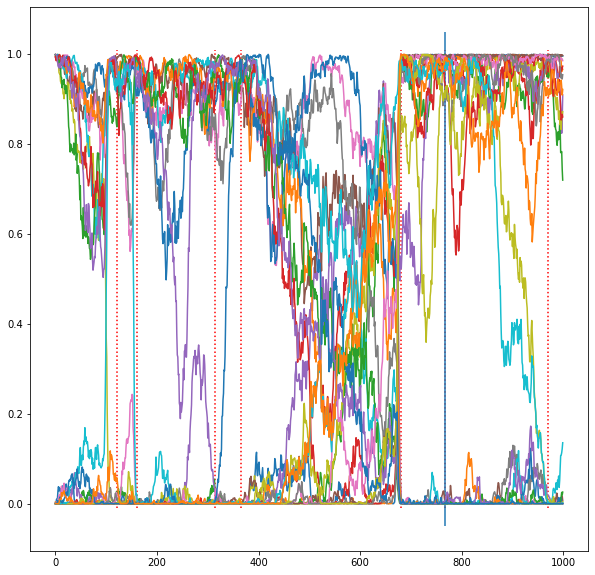

In [231]:
fig, ax = plt.subplots(figsize=(10,10))

diff = lineage.diff()
row = diff.iloc[5]

indices = np.arange(len(row))[row != 0]
time = row.name

gs[indices].plot(legend=False, ax=ax)

for i in lineage.index:
    x = i/100
    plt.vlines(x, ymin=-0.01, ymax=1.01, ls=":", color="r")

plt.vlines(time/100, ymin=-0.05, ymax=1.05)

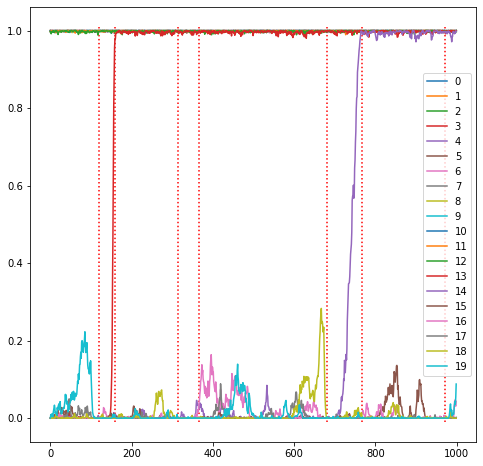

In [210]:
fig, ax = plt.subplots(figsize=(8,8))

primes = gs.iloc[:, 1::4]
primes.columns = range(len(primes.columns))
primes.iloc[:, :20].plot(ax=ax)

for i in lineage.index:
    x = i/100
    plt.vlines(x, ymin=-0.01, ymax=1.01, ls=":", color="r")

plt.show()

# fig, ax = plt.subplots(figsize=(10,10))

# primes = gs.iloc[:, 1::4]
# primes.columns = range(len(primes.columns))
# primes.iloc[:, 40:60].plot(ax=ax)

# for i in lineage.index:
#     x = i/100
#     plt.vlines(x, ymin=-0.1, ymax=1.1, ls=":", color="r")

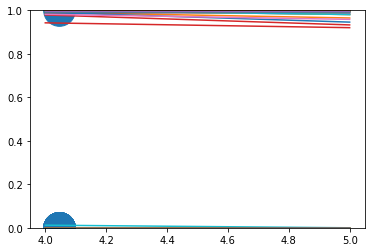

In [116]:
VISOR_RATE = 1000
row = diff.iloc[1]
indices = np.arange(len(row))[row != 0]
pos = row.name // VISOR_RATE
gs.iloc[slice(pos, pos+2), indices].plot(legend=False, ylim=(0,1))

plt.scatter([row.name/1000]*len(indices), row[indices], s=1000)

In [8]:
%%timeit 

np.all(a == a[0])

4.58 µs ± 19.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%%timeit 

np.all(b == b[0])

4.76 µs ± 18 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
%%timeit

for ai in a[1:]:
    if ai != a[0]:
        break

163 ns ± 0.317 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [11]:
%%timeit

for bi in b[1:]:
    if bi != b[0]:
        break

708 µs ± 834 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
